In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


    Error loading stopwords: <urlopen error [Errno 11001] getaddrinfo
        failed>



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
#messages = [line.rstrip() for line in open('smsspancollection/SMSSpamCollection')

In [4]:
messages = [line.rstrip() for line in open('smsspancollection')]

In [5]:
print(len(messages))

5574


In [6]:
type(messages)

list

In [7]:
messages[5000]

'ham\tHmph. Go head, big baller.'

In [8]:
first_10 = messages[:10]

In [9]:
for index,message in enumerate(first_10):
    print(index,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [10]:
for i,mess in enumerate(first_10):
    if i == 3:
        print(str(i) + ' -> ' + mess.lstrip())

3 -> ham	U dun say so early hor... U c already then say...


In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
import pandas as pd

In [13]:
#DataFrame = pd.read_csv('smsspancollection', sep = '\t', names = ['labels', 'message'])

In [14]:
#DataFrame.head()

In [15]:
messages = pd.read_csv('smsspancollection', sep = '\t', names = ['label', 'message'])

In [16]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
type(messages)

pandas.core.frame.DataFrame

In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [19]:
messages.describe()

,label,message
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

In [21]:
messages['length'] = messages['message'].apply(len)

In [22]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

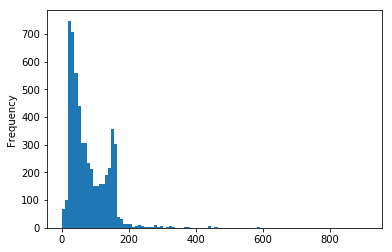

In [24]:
messages['length'].plot.hist(bins = 100)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
messages.length.describe()

count    5572.000000
mean       80.457107
std        59.938275
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121EC730>,
      dtype=object)

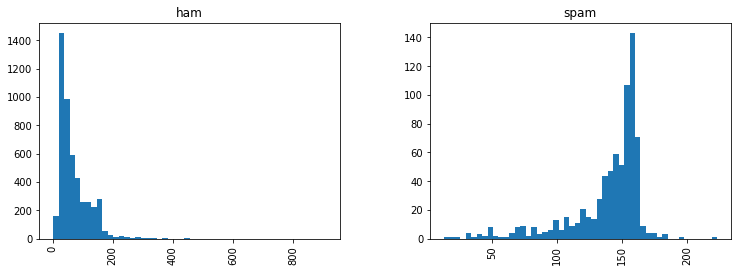

In [28]:
messages.hist(column = 'length', by = 'label', bins = 50, figsize = (12,4))

In [29]:
# now we need to remove all the punctuation and common words from our corpus
# for this..

import string

my_string = 'Hurray! Did you see? we have won the match!'
nopunc = [char for char in my_string if char not in string.punctuation]
#print(nopunc)

# now we need to transform this list into a string
# for this..

nopunc = ''.join(nopunc)
print(nopunc)
type(nopunc)


Hurray Did you see we have won the match


str

In [30]:
from nltk.corpus import stopwords

In [31]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [32]:
nopunc.split()

['Hurray', 'Did', 'you', 'see', 'we', 'have', 'won', 'the', 'match']

In [33]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')[:10] ]

In [34]:
clean_mess

['Hurray', 'Did', 'see', 'have', 'won', 'the', 'match']

In [35]:
nopunc.split()

['Hurray', 'Did', 'you', 'see', 'we', 'have', 'won', 'the', 'match']

In [36]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    mess = [char for char in mess if char not in string.punctuation]
    mess = ''.join(mess)
    mess = mess.split()
    clean_mess = [word for word in mess if word not in stopwords.words('english')]
    
    return clean_mess

text_process('Hey! this is a sample string!')

['Hey', 'sample', 'string']

In [37]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# now we will perform tokenization
# TOKENIZATION -> Process of converting a normal text string, into the list of words
# we want..

# so for this..
messages['message'].head(3).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: message, dtype: object

In [39]:
messages['message'].head(3)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: message, dtype: object

In [40]:
type(messages['message'])

pandas.core.series.Series

In [41]:
#We'll do that in three steps using the bag-of-words model:

#1.Count how many times does a word occur in each message (Known as term frequency)
#2.Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
#3.Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

from sklearn.feature_extraction.text import CountVectorizer


In [42]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [43]:
print(len(bow_transformer.vocabulary_))

11617


In [44]:
message6 = messages['message'][6]
print(message6)
print(len(message6))

Even my brother is not like to speak with me. They treat me like aids patent.
77


In [45]:
bow6 = bow_transformer.transform([message6])
print(bow6)
print(bow6.shape)

  (0, 1851)	1
  (0, 4123)	1
  (0, 4782)	1
  (0, 5385)	1
  (0, 7992)	2
  (0, 8953)	1
  (0, 10163)	1
  (0, 10821)	1
(1, 11617)


In [46]:
message_bow = bow_transformer.transform(messages['message'])

In [47]:
message_bow.nnz

56024

In [49]:
type(message_bow)

scipy.sparse.csr.csr_matrix

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [56]:
tfidf4 = tfidf_transformer.transform(bow6)

In [58]:
print(tfidf4)

  (0, 10821)	0.32010368756958696
  (0, 10163)	0.3120766778327376
  (0, 8953)	0.417233001198699
  (0, 7992)	0.39577905767576305
  (0, 5385)	0.32311823841657367
  (0, 4782)	0.417233001198699
  (0, 4123)	0.2974259445490493
  (0, 1851)	0.32010368756958696


In [59]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [60]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [71]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [73]:
all_predict = spam_detect_model.predict(messages_tfidf)

In [74]:
all_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'])

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn.pipeline import Pipeline

In [97]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer = text_process)),('tfidf', TfidfTransformer()),
                                                                       ('classifier', RandomForestClassifier())])

In [98]:
pipeline.fit(msg_train,label_train)

C:\Users\umair\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11ED1738>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [99]:
predictions = pipeline.predict(msg_test)

In [100]:
from sklearn.metrics import classification_report

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1204
        spam       1.00      0.78      0.88       189

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [103]:
#-->> THE END <<--# :)